# ResNet

## 1. Environment Setup

### 1.0. Check GPU

In [1]:
!nvidia-smi

Mon Jun 22 01:52:14 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64       Driver Version: 440.64       CUDA Version: 10.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  TITAN Xp            Off  | 00000000:17:00.0 Off |                  N/A |
|  0%   31C    P2   165W / 250W |   1173MiB / 12196MiB |     33%      Default |
+-------------------------------+----------------------+----------------------+
|   1  TITAN Xp            Off  | 00000000:65:00.0 Off |                  N/A |
|  0%   35C    P8     8W / 250W |   9106MiB / 12196MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   2  T

### 1.1. Install Pytorch and torchvision

In [2]:
# Install pytorch and torchvision
!pip install --default-timeout=1000 torch torchvision

You should consider upgrading via the 'pip install --upgrade pip' command.


### 1.2. Install matplotlib

In [3]:
!pip install --default-timeout=1000 matplotlib

You should consider upgrading via the 'pip install --upgrade pip' command.


### 1.3. Import

In [4]:
import train

import torch
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt

# Ignore Warning
import warnings
warnings.filterwarnings(action='ignore')

## 2. Data Preprocessing

In [5]:
batch_size = 128

In [6]:
train_transform = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

trainset = torchvision.datasets.CIFAR10('./data/', train=True, download=True, transform=train_transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, pin_memory=True)

testset = torchvision.datasets.CIFAR10('./data/', train=False, download=True, transform=test_transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, pin_memory=True)

Files already downloaded and verified
Files already downloaded and verified


## 3. Train Model

In [7]:
depth = 56
num_classes = 10
pretrained = False

gpu_id = 2
epoch_print = 20

epochs = 250

lr = 0.1
momentum = 0.9
weight_decay = 0.0001

In [8]:
resnet = train.ResNet(depth=depth, num_classes=num_classes, pretrained=pretrained, 
                      gpu_id=gpu_id, epoch_print=epoch_print)

=> Create model with depth : 56


In [9]:
resnet.train(trainloader, testloader, 
             epochs=epochs, lr=lr, momentum=momentum, weight_decay=weight_decay)

Epoch 1 Started...
Iteration : 10 - Train Loss : 3.59, Test Loss : 89709.70, Train Acc : 7.81, Test Acc : 10.00
Iteration : 20 - Train Loss : 2.36, Test Loss : 543.97, Train Acc : 11.72, Test Acc : 11.13
Iteration : 30 - Train Loss : 2.32, Test Loss : 3.63, Train Acc : 10.16, Test Acc : 10.36
Iteration : 40 - Train Loss : 2.28, Test Loss : 2.31, Train Acc : 11.72, Test Acc : 10.02
Iteration : 50 - Train Loss : 2.29, Test Loss : 2.30, Train Acc : 10.94, Test Acc : 10.02
Iteration : 60 - Train Loss : 2.30, Test Loss : 2.30, Train Acc : 9.38, Test Acc : 10.00
Iteration : 70 - Train Loss : 2.29, Test Loss : 2.30, Train Acc : 13.28, Test Acc : 10.00
Iteration : 80 - Train Loss : 2.32, Test Loss : 2.30, Train Acc : 8.59, Test Acc : 10.01
Iteration : 90 - Train Loss : 2.29, Test Loss : 2.30, Train Acc : 16.41, Test Acc : 10.00
Iteration : 100 - Train Loss : 2.31, Test Loss : 2.30, Train Acc : 11.72, Test Acc : 10.25
Iteration : 110 - Train Loss : 2.29, Test Loss : 2.31, Train Acc : 10.16, Tes

Iteration : 130 - Train Loss : 0.17, Test Loss : 0.51, Train Acc : 94.53, Test Acc : 84.52
Iteration : 140 - Train Loss : 0.28, Test Loss : 0.57, Train Acc : 89.06, Test Acc : 82.97
Iteration : 150 - Train Loss : 0.28, Test Loss : 0.52, Train Acc : 90.62, Test Acc : 84.07
Iteration : 160 - Train Loss : 0.26, Test Loss : 0.51, Train Acc : 90.62, Test Acc : 84.72
Iteration : 170 - Train Loss : 0.28, Test Loss : 0.48, Train Acc : 89.84, Test Acc : 85.09
Iteration : 180 - Train Loss : 0.32, Test Loss : 0.57, Train Acc : 88.28, Test Acc : 83.27
Iteration : 190 - Train Loss : 0.27, Test Loss : 0.50, Train Acc : 90.62, Test Acc : 84.67
Iteration : 200 - Train Loss : 0.26, Test Loss : 0.52, Train Acc : 90.62, Test Acc : 84.42
Iteration : 210 - Train Loss : 0.29, Test Loss : 0.49, Train Acc : 91.41, Test Acc : 84.05
Iteration : 220 - Train Loss : 0.18, Test Loss : 0.48, Train Acc : 92.97, Test Acc : 84.77
Iteration : 230 - Train Loss : 0.32, Test Loss : 0.59, Train Acc : 88.28, Test Acc : 81.41

Iteration : 250 - Train Loss : 0.18, Test Loss : 0.64, Train Acc : 95.31, Test Acc : 82.57
Iteration : 260 - Train Loss : 0.24, Test Loss : 0.45, Train Acc : 93.75, Test Acc : 87.06
Iteration : 270 - Train Loss : 0.14, Test Loss : 0.41, Train Acc : 96.88, Test Acc : 87.58
Iteration : 280 - Train Loss : 0.24, Test Loss : 0.54, Train Acc : 89.06, Test Acc : 85.04
Iteration : 290 - Train Loss : 0.23, Test Loss : 0.50, Train Acc : 92.19, Test Acc : 86.37
Iteration : 300 - Train Loss : 0.28, Test Loss : 0.48, Train Acc : 91.41, Test Acc : 86.77
Iteration : 310 - Train Loss : 0.10, Test Loss : 0.44, Train Acc : 97.66, Test Acc : 87.24
Iteration : 320 - Train Loss : 0.12, Test Loss : 0.38, Train Acc : 93.75, Test Acc : 88.17
Iteration : 330 - Train Loss : 0.20, Test Loss : 0.41, Train Acc : 94.53, Test Acc : 87.89
Iteration : 340 - Train Loss : 0.27, Test Loss : 0.44, Train Acc : 91.41, Test Acc : 86.93
Iteration : 350 - Train Loss : 0.22, Test Loss : 0.42, Train Acc : 91.41, Test Acc : 87.41

Iteration : 370 - Train Loss : 0.16, Test Loss : 0.37, Train Acc : 94.53, Test Acc : 88.51
Iteration : 380 - Train Loss : 0.21, Test Loss : 0.38, Train Acc : 91.41, Test Acc : 88.70
Iteration : 390 - Train Loss : 0.11, Test Loss : 0.47, Train Acc : 96.88, Test Acc : 87.21
Epoch 141 Started...
Iteration : 10 - Train Loss : 0.01, Test Loss : 0.28, Train Acc : 99.22, Test Acc : 92.86
Iteration : 20 - Train Loss : 0.01, Test Loss : 0.28, Train Acc : 99.22, Test Acc : 92.79
Iteration : 30 - Train Loss : 0.03, Test Loss : 0.28, Train Acc : 99.22, Test Acc : 92.85
Iteration : 40 - Train Loss : 0.01, Test Loss : 0.28, Train Acc : 100.00, Test Acc : 92.78
Iteration : 50 - Train Loss : 0.04, Test Loss : 0.28, Train Acc : 98.44, Test Acc : 92.67
Iteration : 60 - Train Loss : 0.01, Test Loss : 0.28, Train Acc : 100.00, Test Acc : 92.71
Iteration : 70 - Train Loss : 0.02, Test Loss : 0.28, Train Acc : 99.22, Test Acc : 92.83
Iteration : 80 - Train Loss : 0.00, Test Loss : 0.28, Train Acc : 100.00, 

Iteration : 90 - Train Loss : 0.00, Test Loss : 0.31, Train Acc : 100.00, Test Acc : 92.97
Iteration : 100 - Train Loss : 0.00, Test Loss : 0.31, Train Acc : 100.00, Test Acc : 93.01
Iteration : 110 - Train Loss : 0.00, Test Loss : 0.31, Train Acc : 100.00, Test Acc : 93.05
Iteration : 120 - Train Loss : 0.00, Test Loss : 0.31, Train Acc : 100.00, Test Acc : 93.10
Iteration : 130 - Train Loss : 0.02, Test Loss : 0.31, Train Acc : 99.22, Test Acc : 93.14
Iteration : 140 - Train Loss : 0.00, Test Loss : 0.31, Train Acc : 100.00, Test Acc : 93.08
Iteration : 150 - Train Loss : 0.01, Test Loss : 0.31, Train Acc : 99.22, Test Acc : 93.20
Iteration : 160 - Train Loss : 0.00, Test Loss : 0.31, Train Acc : 100.00, Test Acc : 93.14
Iteration : 170 - Train Loss : 0.00, Test Loss : 0.31, Train Acc : 100.00, Test Acc : 93.02
Iteration : 180 - Train Loss : 0.00, Test Loss : 0.31, Train Acc : 100.00, Test Acc : 93.04
Iteration : 190 - Train Loss : 0.01, Test Loss : 0.31, Train Acc : 99.22, Test Acc 

Iteration : 200 - Train Loss : 0.00, Test Loss : 0.31, Train Acc : 100.00, Test Acc : 93.35
Iteration : 210 - Train Loss : 0.00, Test Loss : 0.31, Train Acc : 100.00, Test Acc : 93.34
Iteration : 220 - Train Loss : 0.00, Test Loss : 0.31, Train Acc : 100.00, Test Acc : 93.43
Iteration : 230 - Train Loss : 0.00, Test Loss : 0.31, Train Acc : 100.00, Test Acc : 93.39
Iteration : 240 - Train Loss : 0.00, Test Loss : 0.31, Train Acc : 100.00, Test Acc : 93.35
Iteration : 250 - Train Loss : 0.00, Test Loss : 0.31, Train Acc : 100.00, Test Acc : 93.25
Iteration : 260 - Train Loss : 0.00, Test Loss : 0.31, Train Acc : 100.00, Test Acc : 93.36
Iteration : 270 - Train Loss : 0.01, Test Loss : 0.31, Train Acc : 99.22, Test Acc : 93.25
Iteration : 280 - Train Loss : 0.01, Test Loss : 0.31, Train Acc : 100.00, Test Acc : 93.31
Iteration : 290 - Train Loss : 0.00, Test Loss : 0.31, Train Acc : 100.00, Test Acc : 93.37
Iteration : 300 - Train Loss : 0.00, Test Loss : 0.31, Train Acc : 100.00, Test A

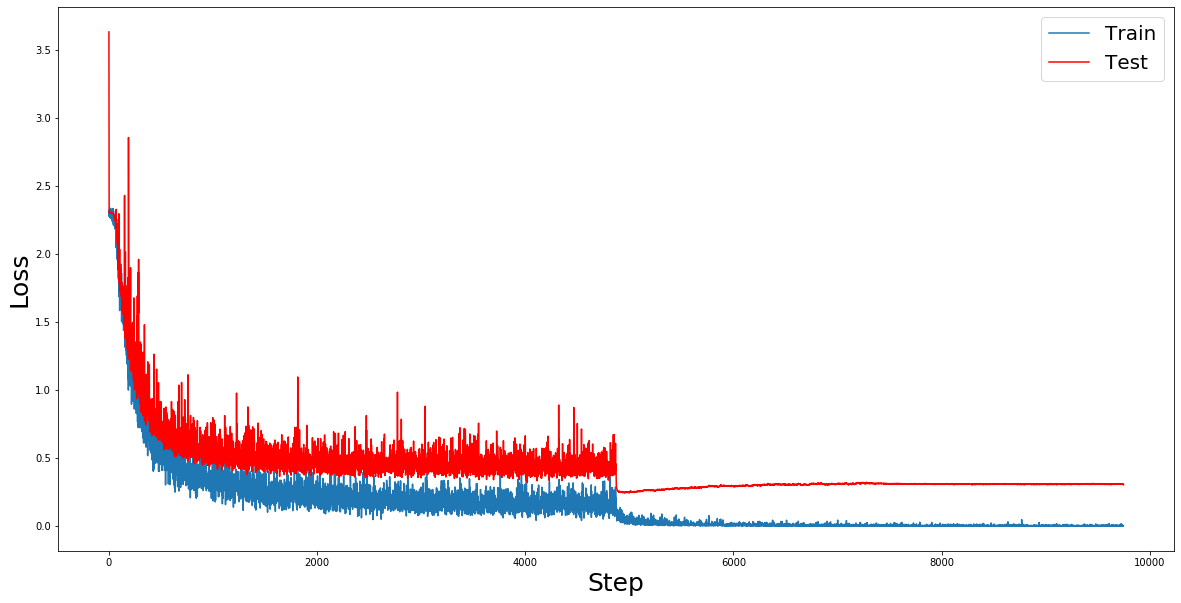

In [10]:
label_fontsize = 25

plt.figure(figsize=(20, 10))
train_lossline, = plt.plot(resnet.train_losses[2:], label='Train')
test_lossline, = plt.plot(resnet.test_losses[2:], color='red', label='Test')
plt.legend(handles=[train_lossline, test_lossline], fontsize=20)
plt.xlabel('Step', fontsize=label_fontsize)
plt.ylabel('Loss', fontsize=label_fontsize)
plt.show()

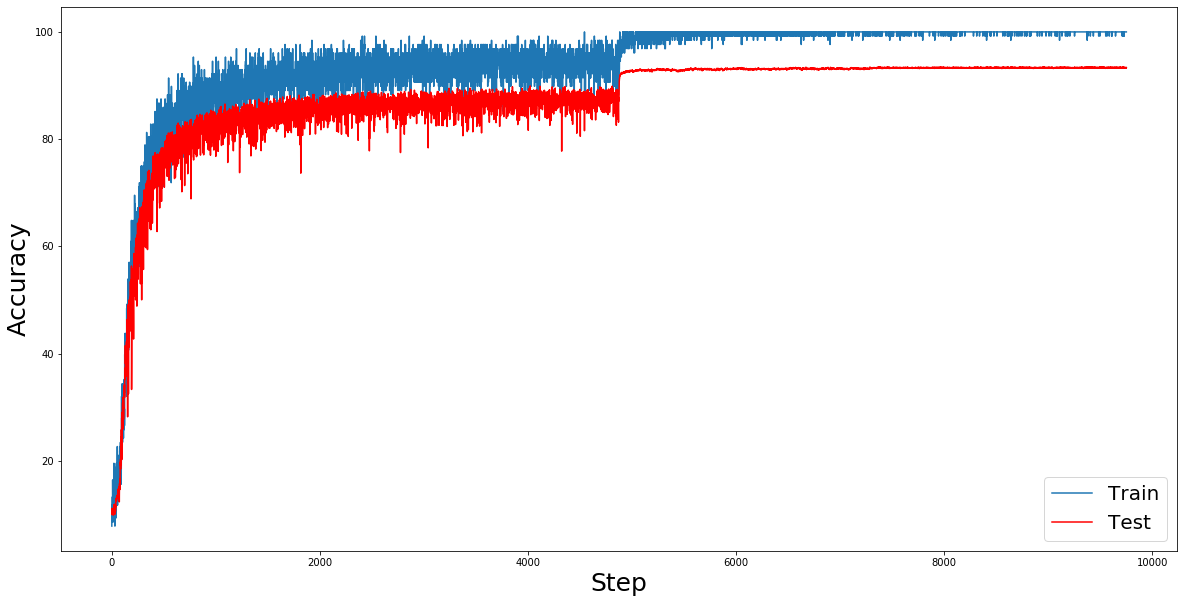

In [11]:
plt.figure(figsize=(20, 10))
train_accline, = plt.plot(resnet.train_acc, label='Train')
test_accline, = plt.plot(resnet.test_acc, color='red', label='Test')
plt.legend(handles=[train_accline, test_accline], fontsize=20)
plt.xlabel('Step', fontsize=label_fontsize)
plt.ylabel('Accuracy', fontsize=label_fontsize)
plt.show()